## Import Required Libraries

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Download datasets

In [123]:
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

In [124]:
X = pd.concat([train.drop('SalePrice', axis=1), test], axis=0).reset_index(drop=True)

In [125]:
y = train[['SalePrice']]
y['SalePrice'] = np.log(y['SalePrice'])

In [126]:
columns = X.columns

## Numeric columns vs Categorical columns

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [128]:
cat_col = X.select_dtypes(include=['object']).columns
num_col = [col for col in columns if col not in cat_col]

## Continuou columns vs Discrete columns

In [129]:
for col in num_col:
    print(f'The number of unique value of {col}: {X[col].nunique()}')

The number of unique value of Id: 2919
The number of unique value of MSSubClass: 16
The number of unique value of LotFrontage: 128
The number of unique value of LotArea: 1951
The number of unique value of OverallQual: 10
The number of unique value of OverallCond: 9
The number of unique value of YearBuilt: 118
The number of unique value of YearRemodAdd: 61
The number of unique value of MasVnrArea: 444
The number of unique value of BsmtFinSF1: 991
The number of unique value of BsmtFinSF2: 272
The number of unique value of BsmtUnfSF: 1135
The number of unique value of TotalBsmtSF: 1058
The number of unique value of 1stFlrSF: 1083
The number of unique value of 2ndFlrSF: 635
The number of unique value of LowQualFinSF: 36
The number of unique value of GrLivArea: 1292
The number of unique value of BsmtFullBath: 4
The number of unique value of BsmtHalfBath: 3
The number of unique value of FullBath: 5
The number of unique value of HalfBath: 3
The number of unique value of BedroomAbvGr: 8
The nu

In [130]:
disc_col = [col for col in num_col if X[col].nunique()<30]
cont_col = [col for col in num_col if col not in disc_col]

## Data distribution

* categorical columns

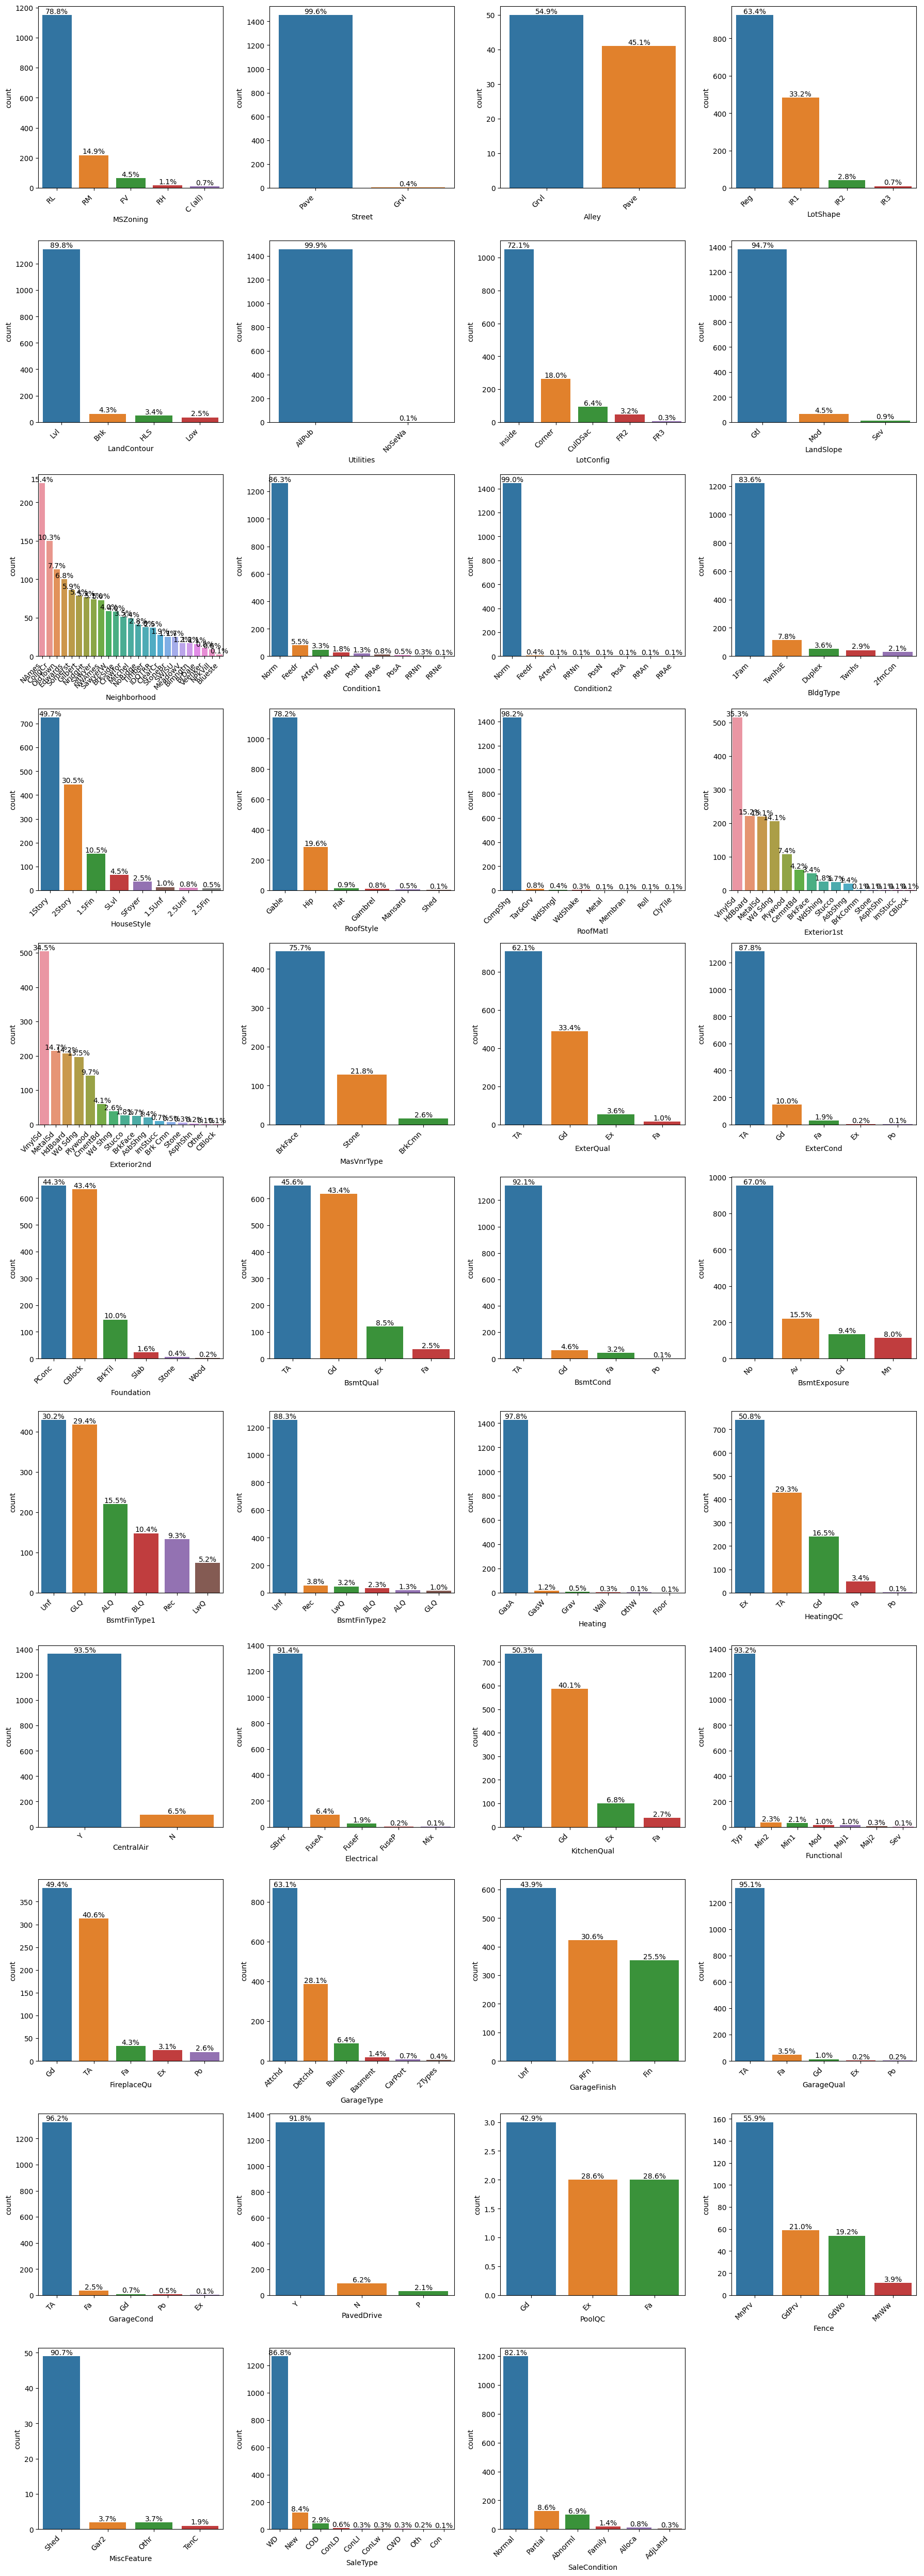

In [131]:
fig = plt.figure(figsize=(18, 50))

for index, col in enumerate(cat_col):
    plt.subplot(11, 4, index+1)
    
    value_counts = train[col].value_counts()
    total = value_counts.sum()
    percentages = (value_counts / total) * 100

    ax = sns.countplot(x=train[col], order=value_counts.index)

    for p, percentage in zip(ax.patches, percentages):
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.xticks(rotation=45, ha='right')

fig.tight_layout(pad=1.0)
plt.show()


* discrete columns

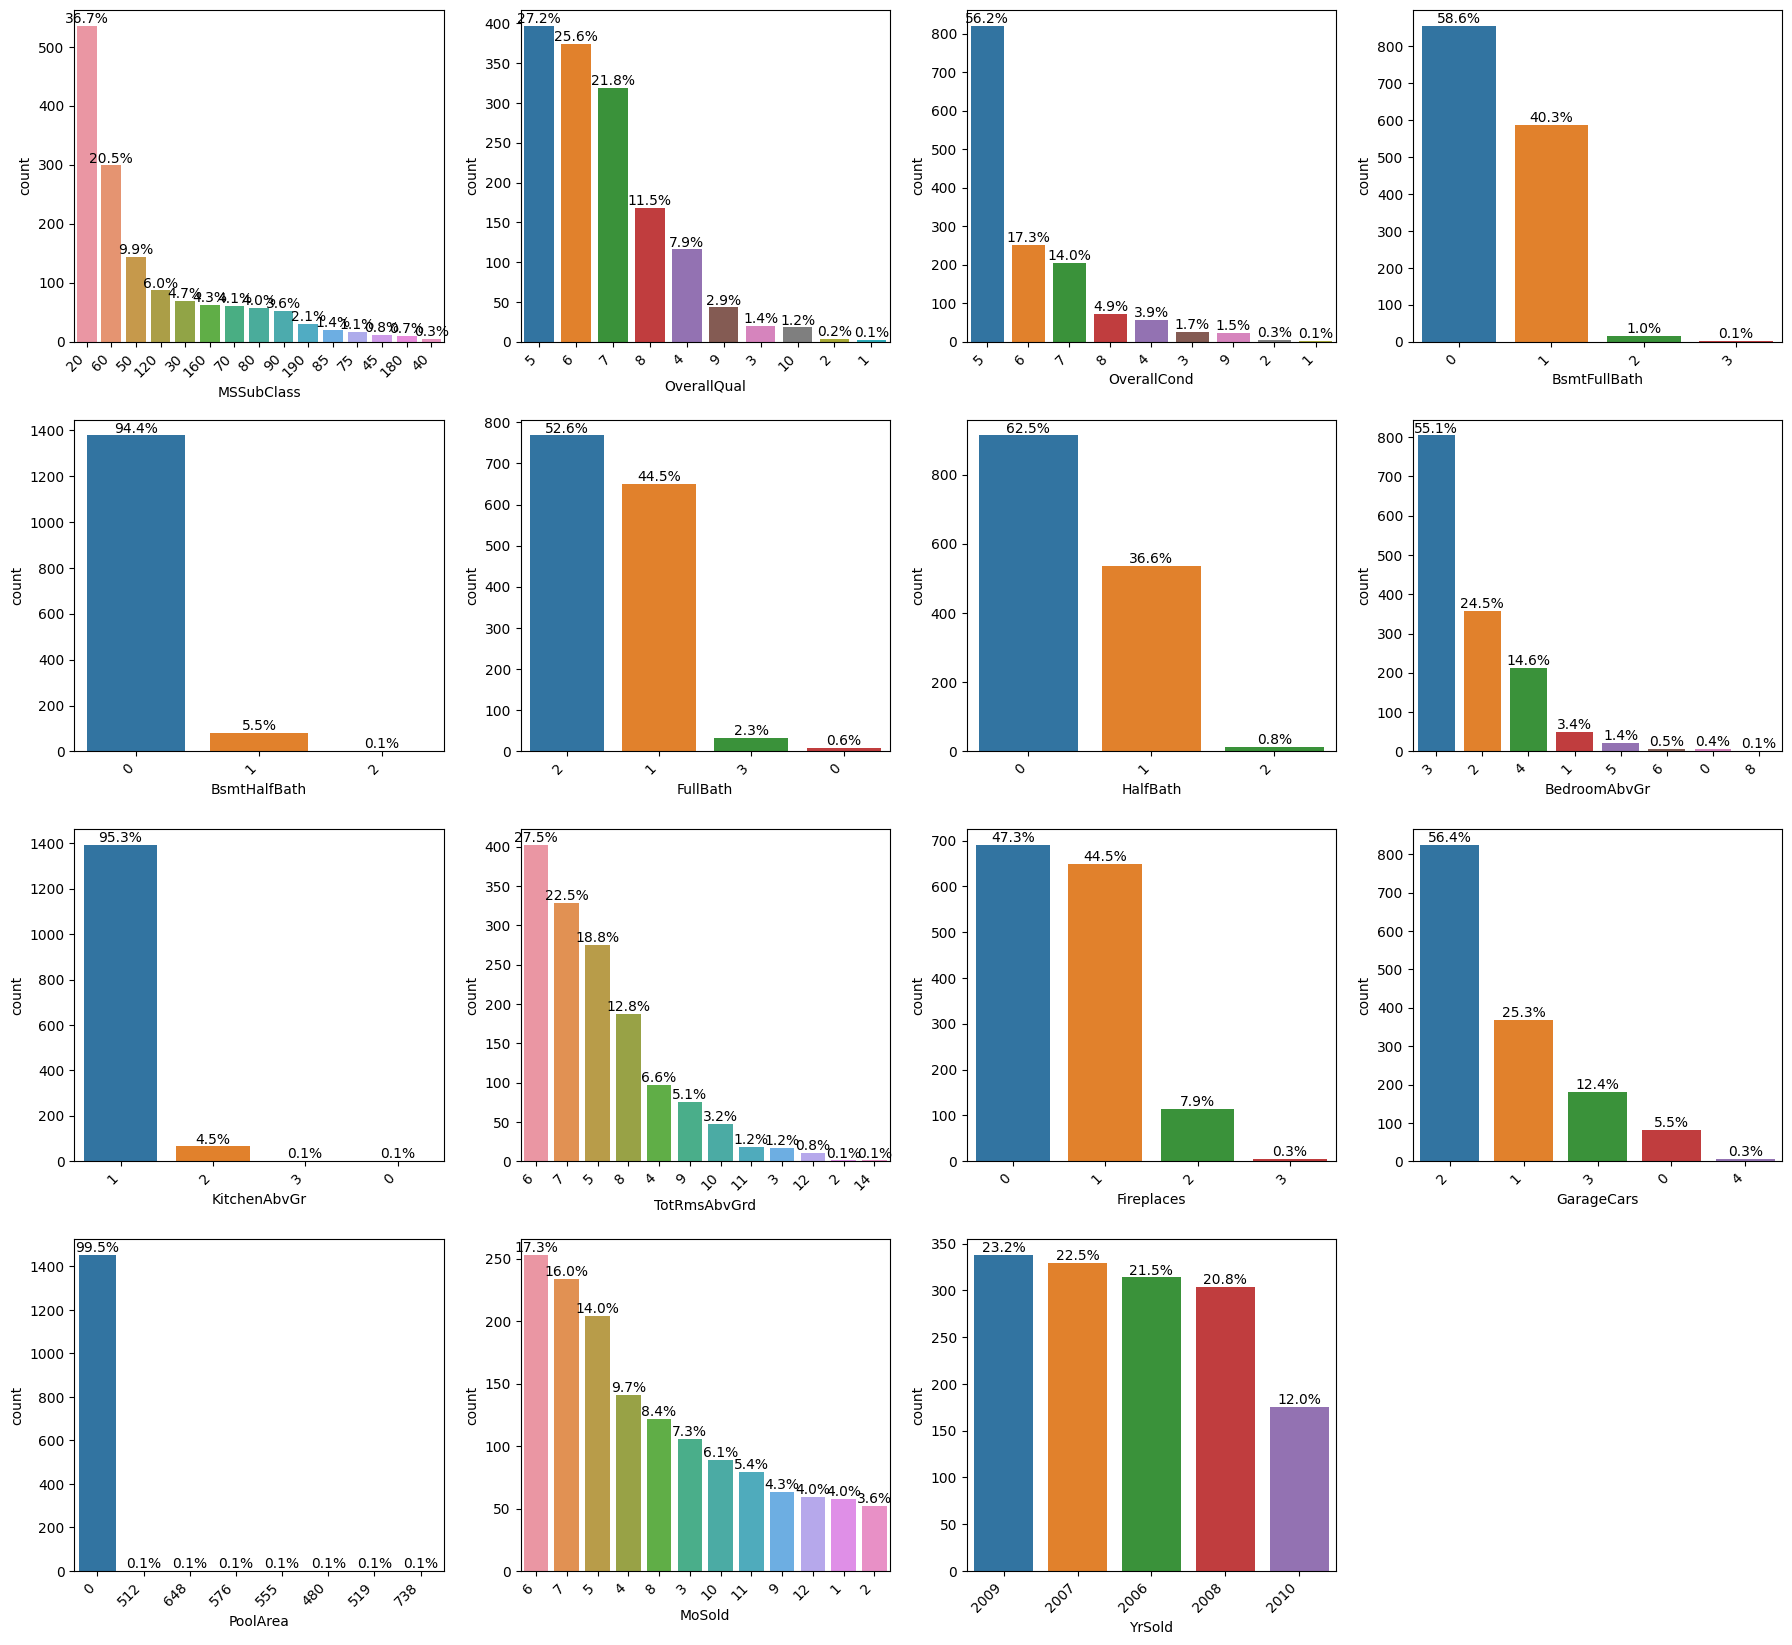

In [132]:
fig = plt.figure(figsize=(18, 20))

for index, col in enumerate(disc_col):
    plt.subplot(5, 4, index+1)
    
    value_counts = train[col].value_counts()
    total = value_counts.sum()
    percentages = (value_counts / total) * 100

    ax = sns.countplot(x=train[col], order=value_counts.index)

    for p, percentage in zip(ax.patches, percentages):
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.xticks(rotation=45, ha='right')

fig.tight_layout(pad=1.0)
plt.show()

#### Note
* #### later drop the columns which only one data share more than 95%

* continuous columns

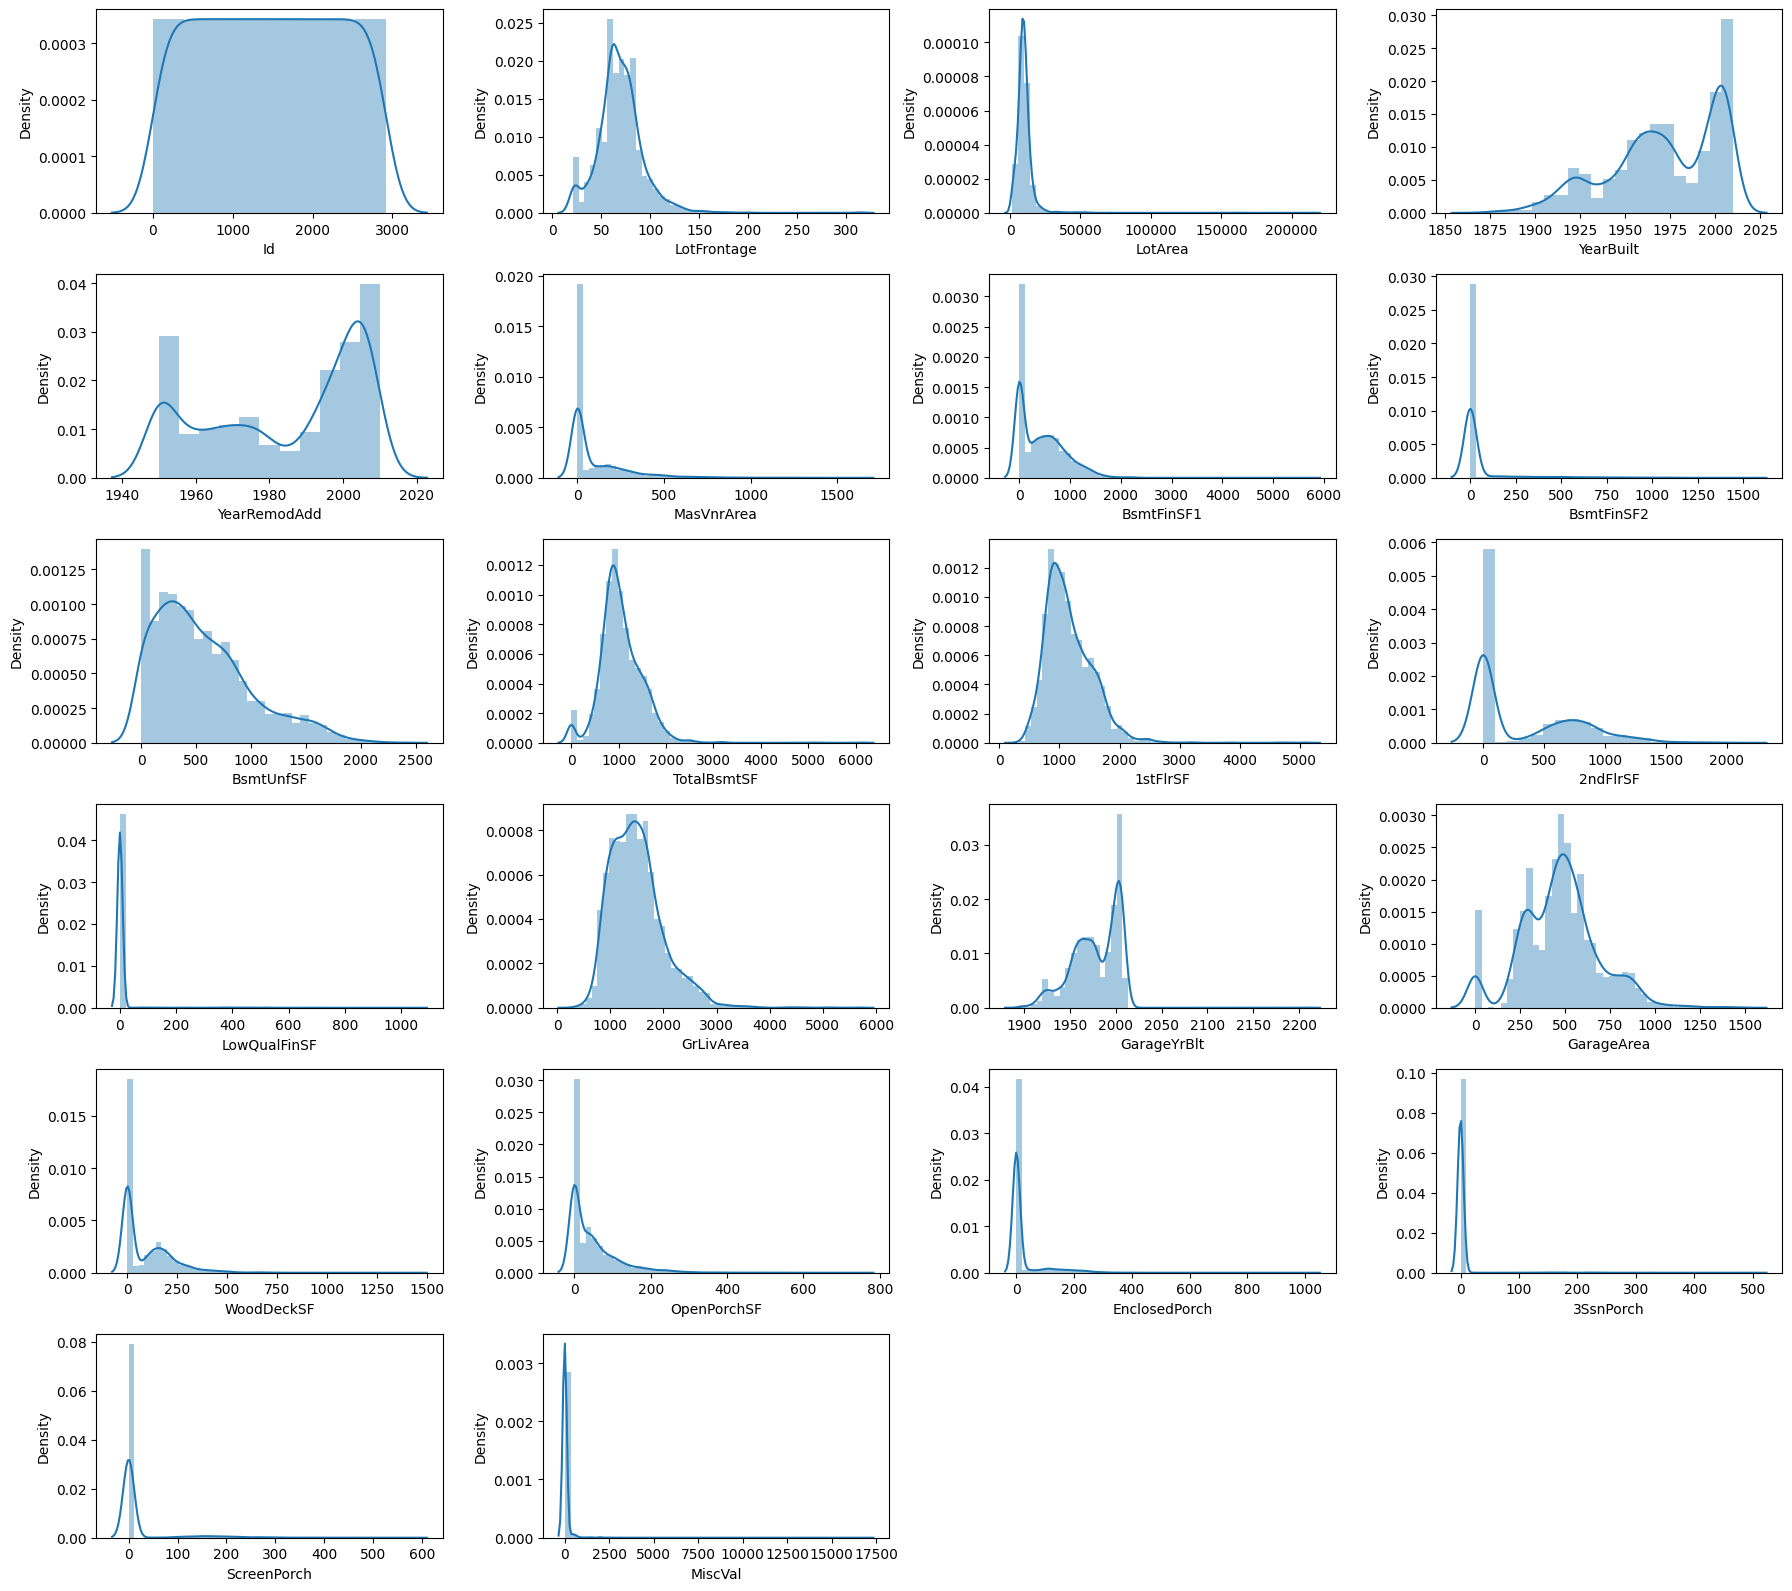

In [133]:
fig = plt.figure(figsize=(18, 16))
for index, col in enumerate(cont_col):
    plt.subplot(6, 4, index+1)
    sns.distplot(X.loc[:, col].dropna(), kde=True)
fig.tight_layout(pad=1.0)
plt.show()

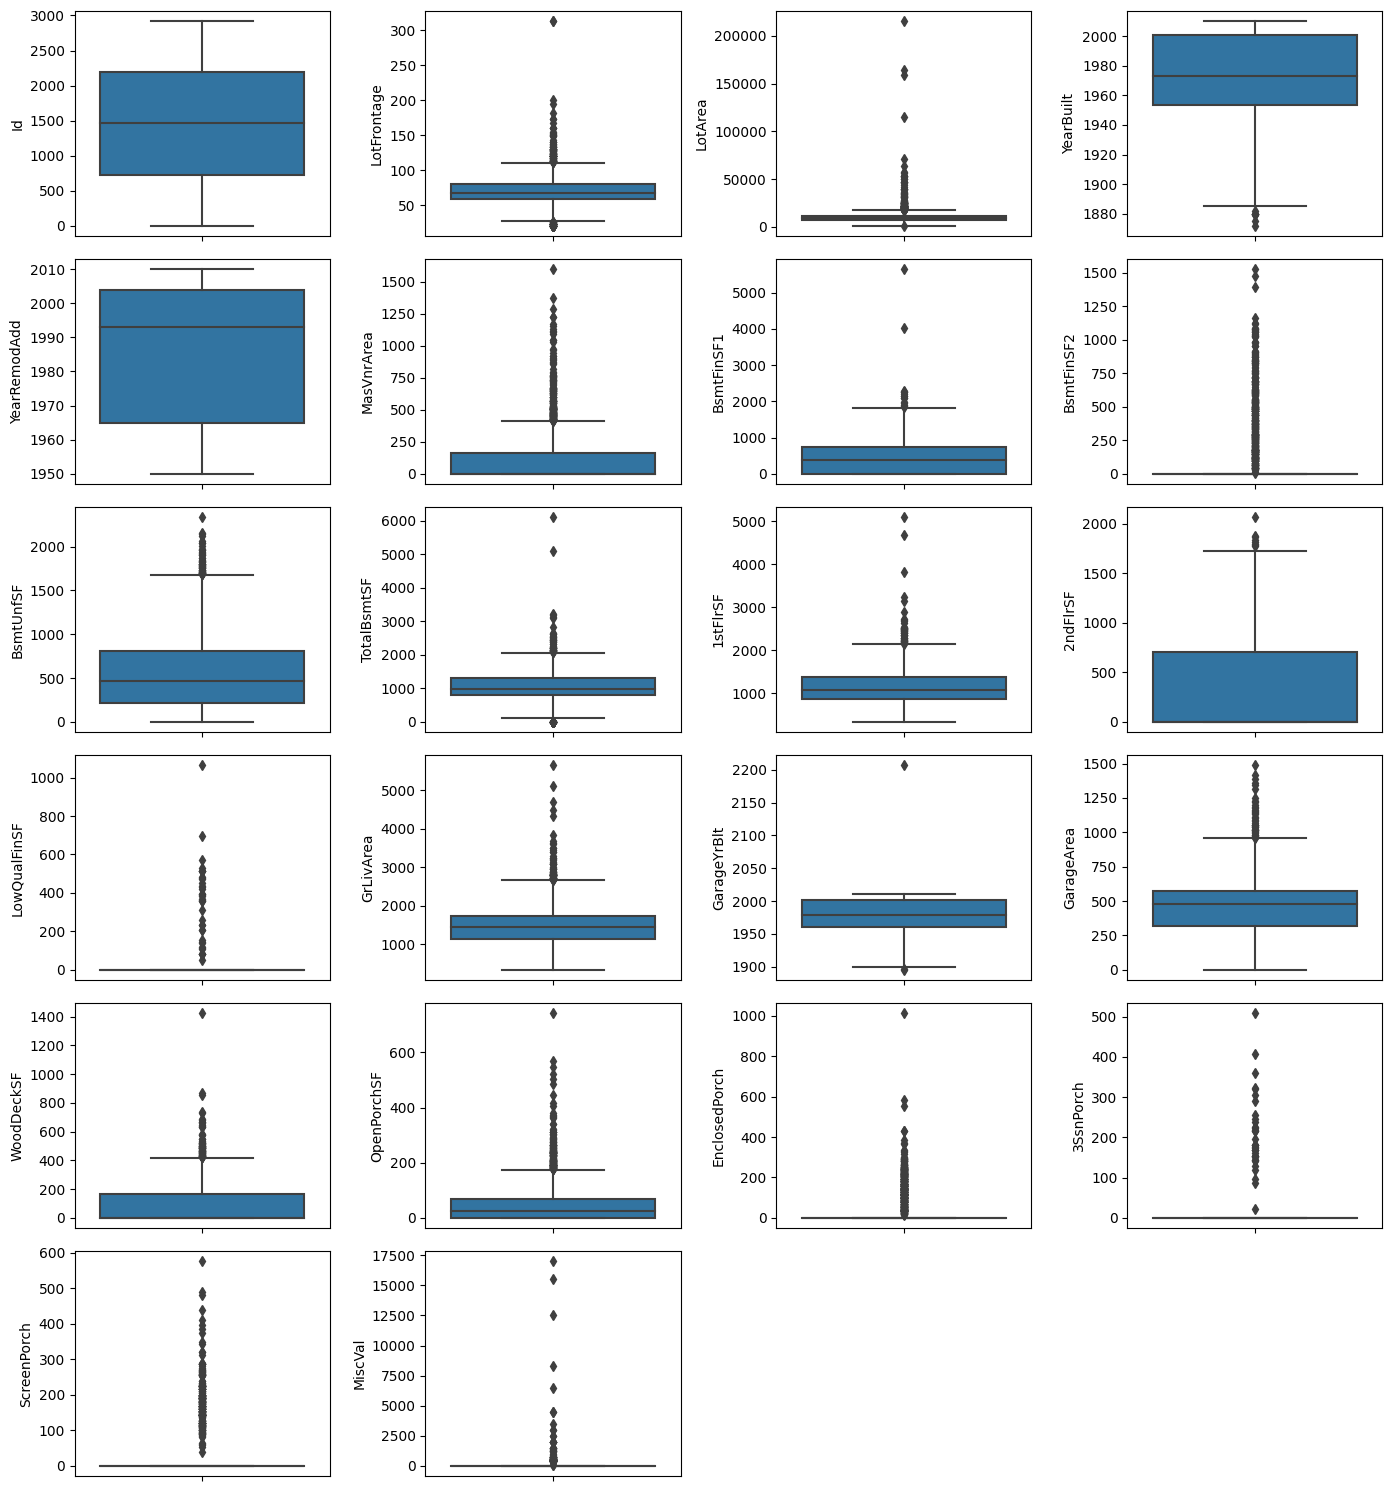

In [134]:
fig = plt.figure(figsize=(14,15))
for index, col in enumerate(cont_col):
    plt.subplot(6, 4, index+1)
    sns.boxplot(y=pd.to_numeric(X[col].dropna(), errors='coerce'))
fig.tight_layout(pad=1.0)
plt.show()

### The corelation of Numeric Columns and SalePrice

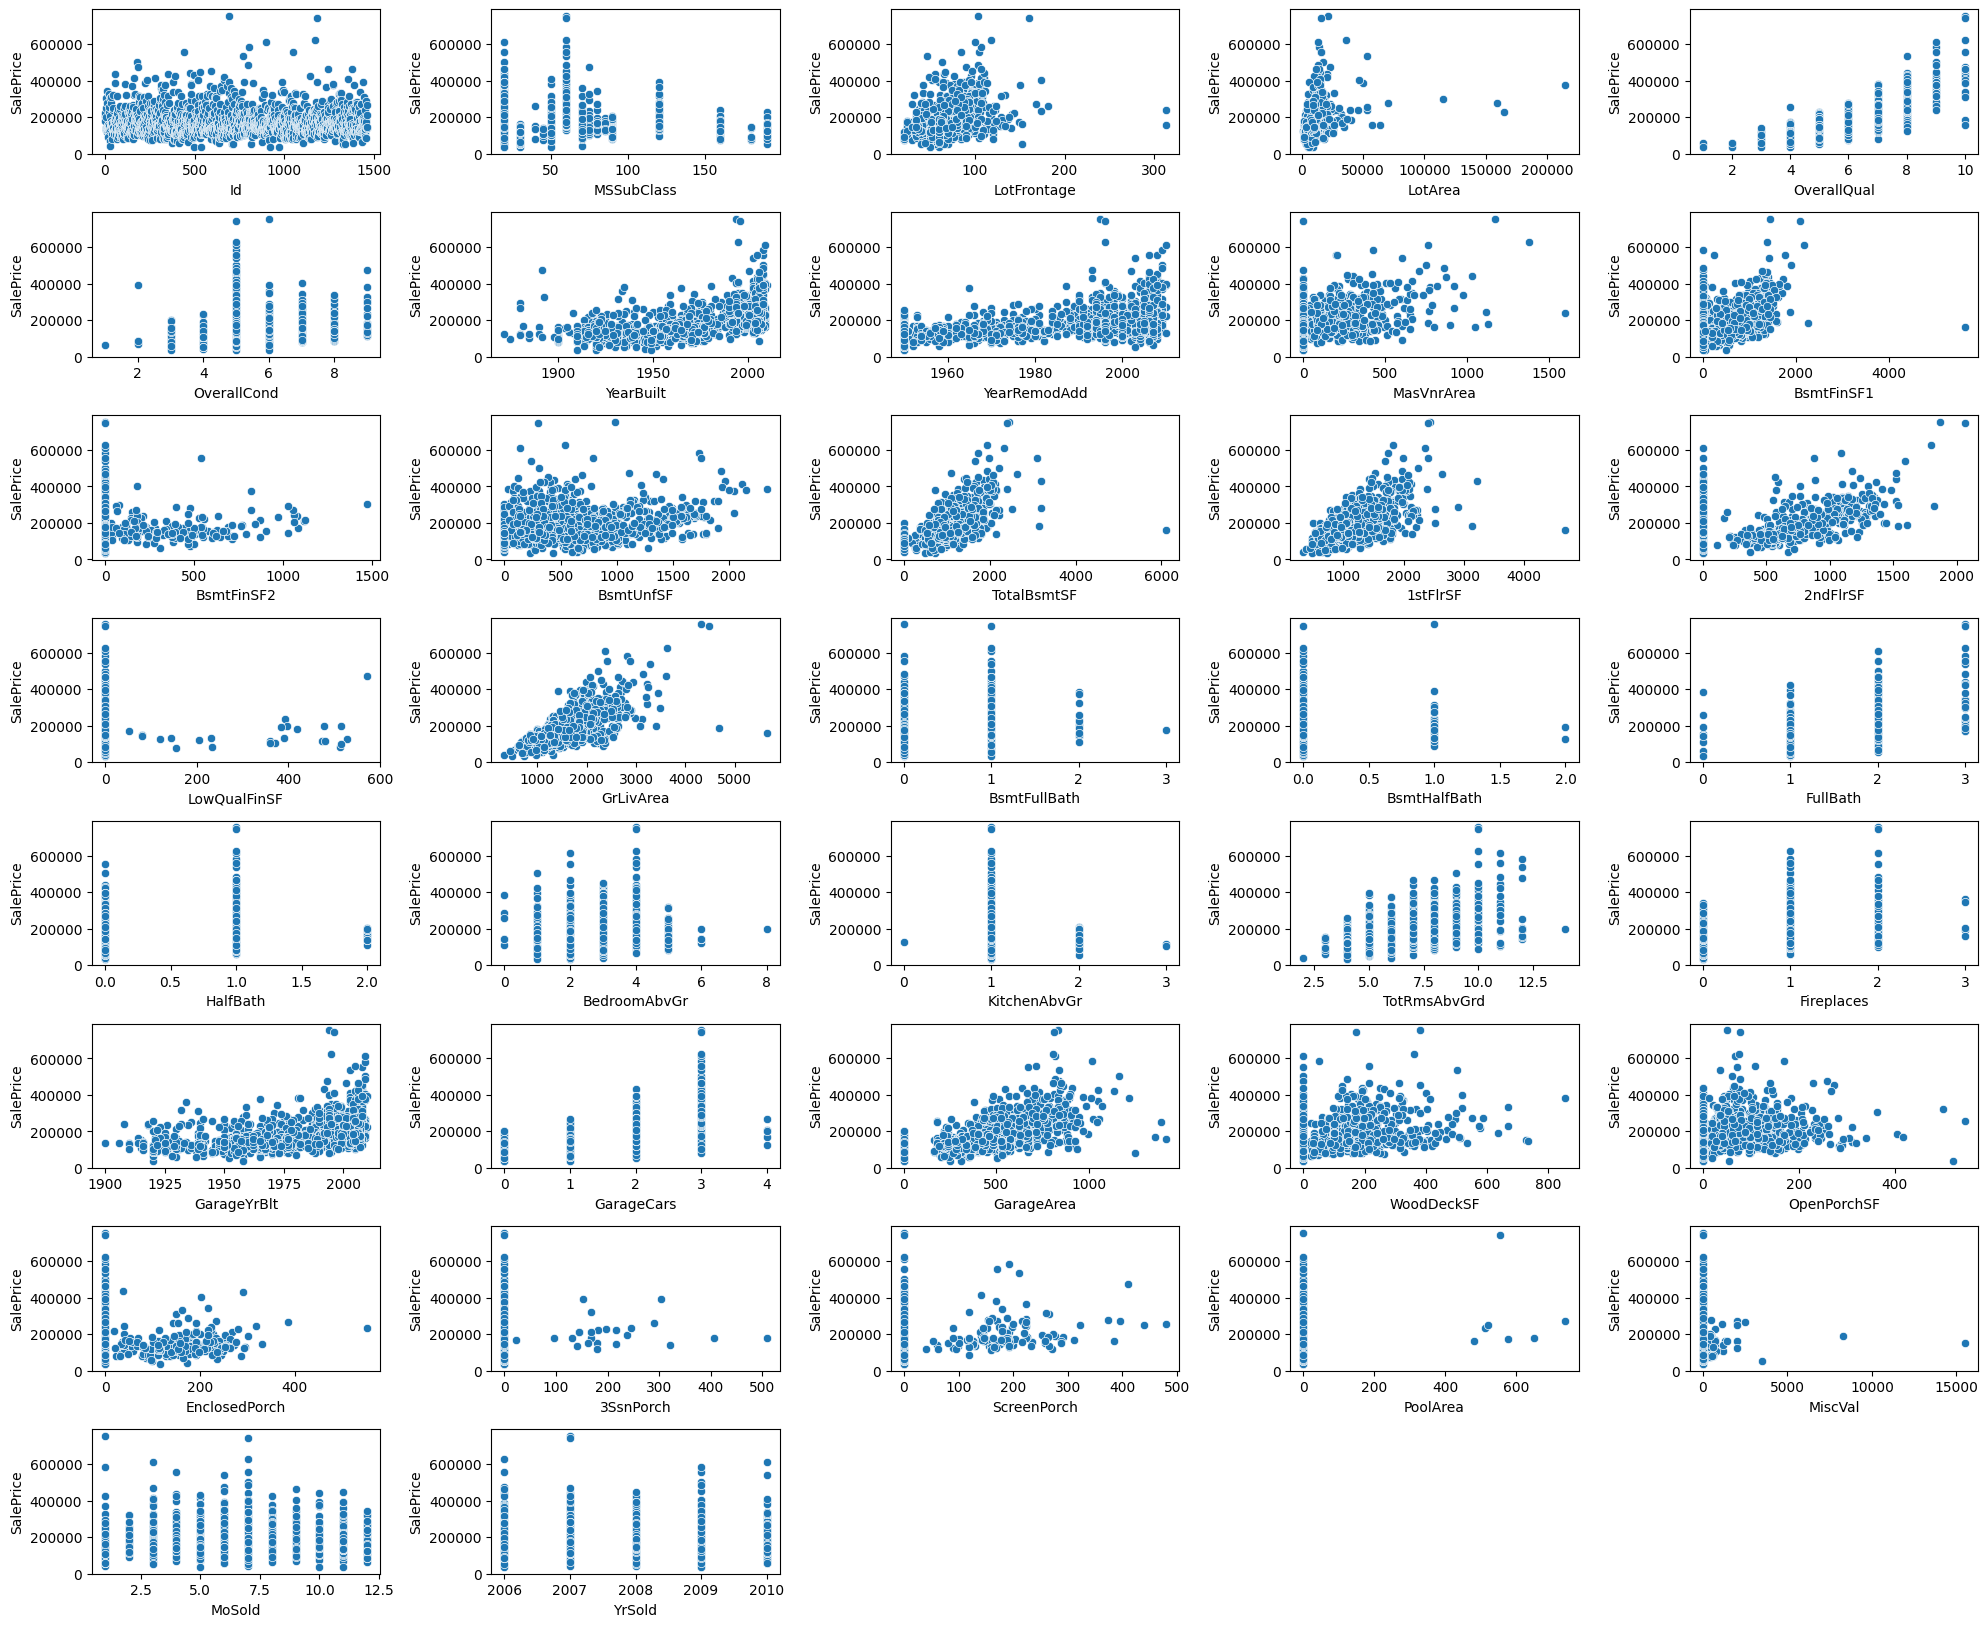

In [135]:
fig = plt.figure(figsize=(20,20))

for index, col in enumerate(num_col):
    plt.subplot(10, 5, index+1)
    sns.scatterplot(x=train[col], y=train['SalePrice'])
    ax.set_xlabel(col)
    ax.set_ylabel('SalePrice')
    ax.set_title(f"Scatter Plot: {col} vs SalePrice")

plt.tight_layout()
plt.show()

## Missing Values

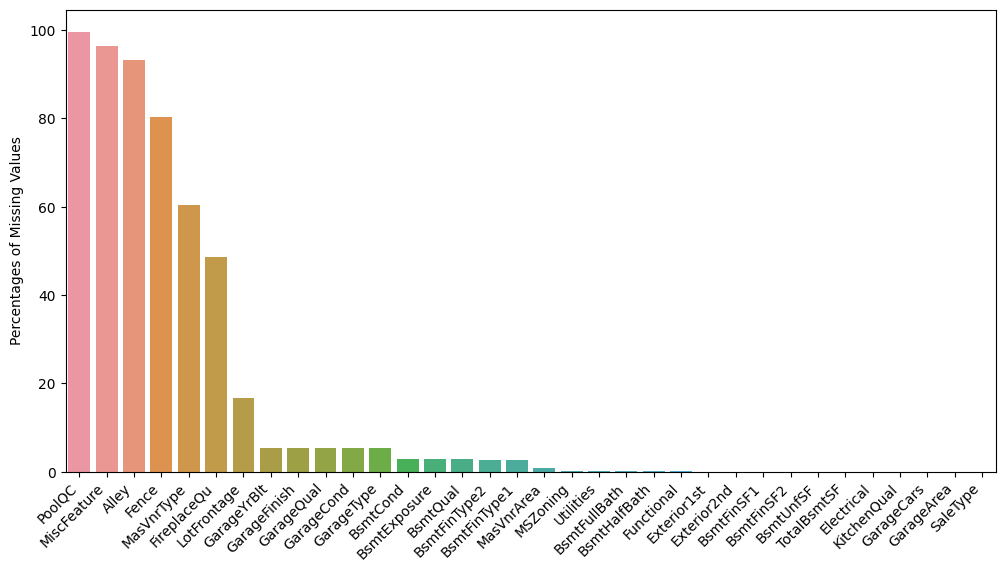

In [136]:
missing_percentages = {col: (X[col].isnull().sum()/X.shape[0]*100) for col in columns}
missing_percentages = {k: v for k, v in missing_percentages.items() if v>0}

missing_percentages = dict(sorted(missing_percentages.items(), key=lambda item:item[1], reverse=True))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(missing_percentages.keys()), y=list(missing_percentages.values()))

plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentages of Missing Values')

plt.show()

### Remove unuseful columns

In [137]:
RMV = ['Id','Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'PoolQC', 'MiscFeature', 'Alley']

In [138]:
X.drop(RMV, axis=1, inplace=True)

## Check how much missing values affect the SalePrice

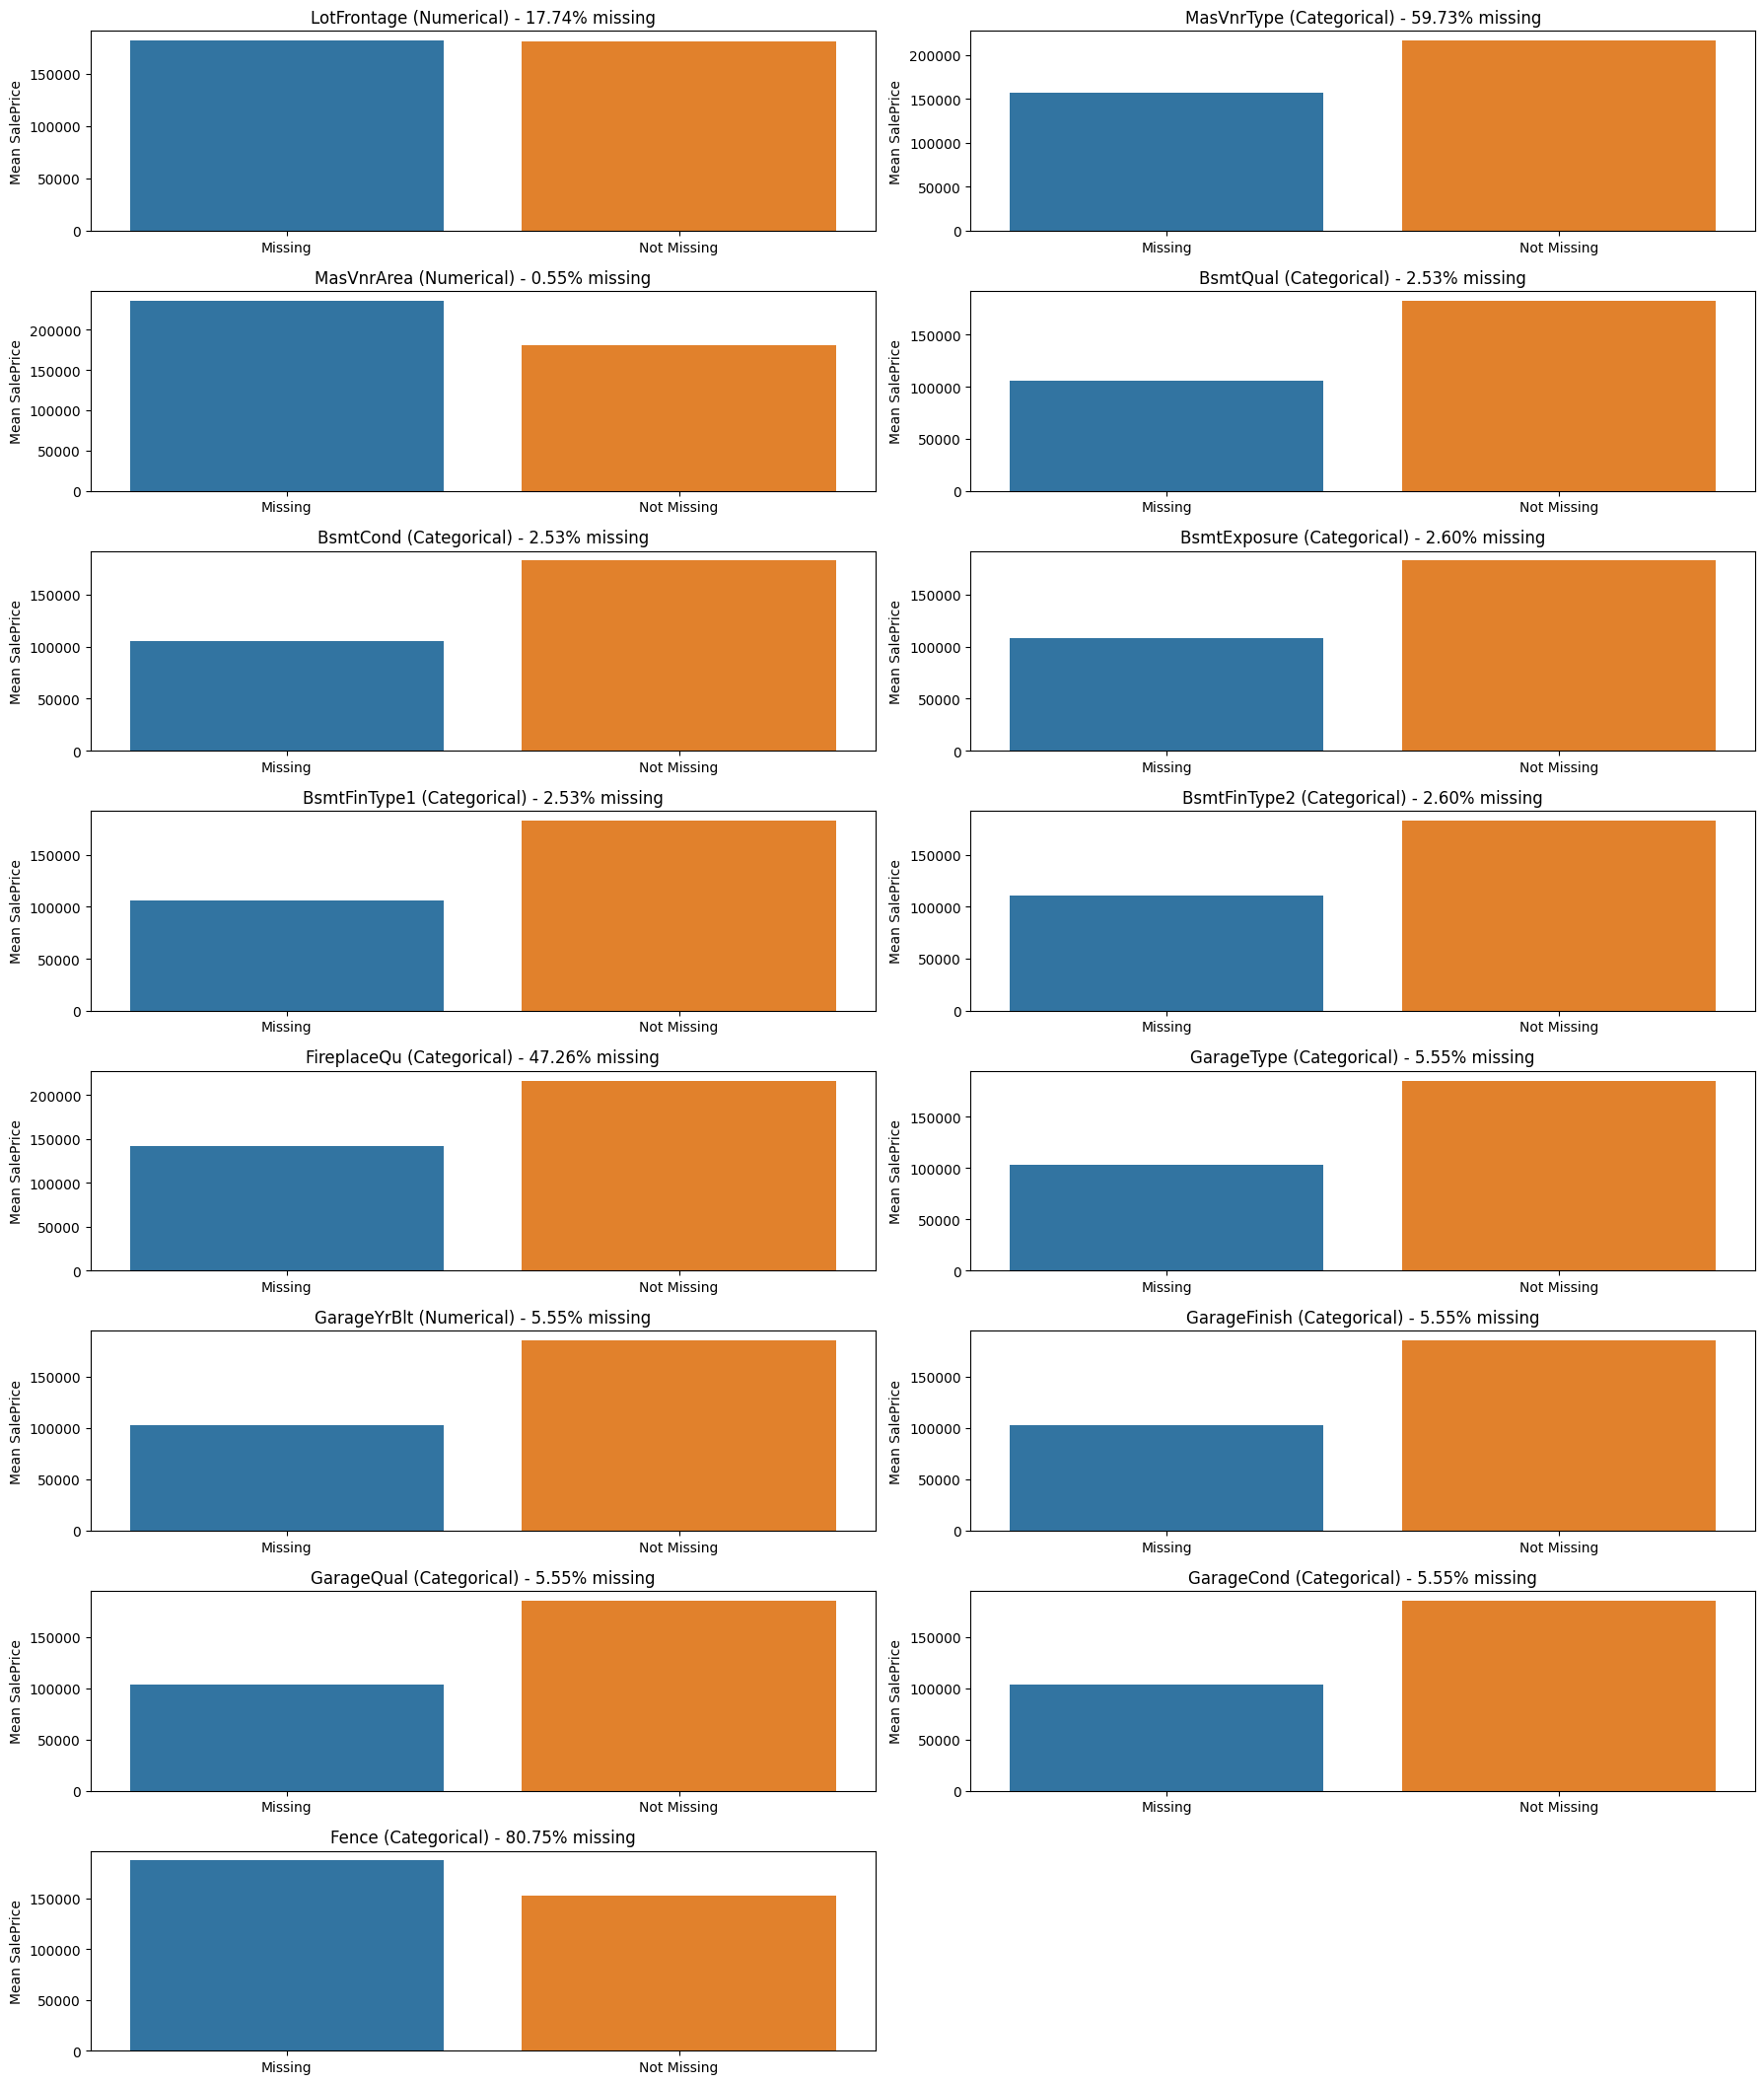

In [139]:
n_null_columns = train.isnull().sum().gt(0).sum()

fig = plt.figure(figsize=(18, 50))
i = 1

for col in X.columns:
    missing_count = train[col].isnull().sum()
    total_count = len(train)
    
    if missing_count > 1:
        
        missing_percentage = (missing_count / total_count) * 100
        
        
        train_missing = train[train[col].isnull()]
        train_not_missing = train[train[col].notnull()]

        # Detect column type (categorical or numerical)
        col_type = "Categorical" if train[col].dtype == "object" else "Numerical"

        # Create subplot
        plt.subplot(n_null_columns, 2, i)
        sns.barplot(x=['Missing', 'Not Missing'], 
                    y=[train_missing['SalePrice'].mean(), train_not_missing['SalePrice'].mean()])
        
        # Add title with column name, type, and missing percentage
        plt.title(f"{col} ({col_type}) - {missing_percentage:.2f}% missing")
        plt.ylabel('Mean SalePrice')
        i += 1

plt.tight_layout()
plt.show()


If a **categorical column** has:

- **More than 2% missing values**, and  
- A **difference** in the mean `SalePrice` between missing and non-missing values,  

Then, replace `NaN` with a **new category** instead of imputing with the mode or dropping the data.

In [140]:
new_cat_col = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'GarageQual', 'Fence']

In [141]:
missing_num_col = ['LotFrontage','MasVnrArea', 'GarageYrBlt']

In [142]:
for col in new_cat_col:
    X[col] = X[col].fillna('Missing')

In [143]:
X[missing_num_col] = X[missing_num_col].fillna(X[missing_num_col].mean())


I still need to handle the missing values on the test data

In [144]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col].fillna(X[col].mode()[0], inplace=True)
    else: 
        X[col].fillna(X[col].mean(), inplace=True)


In [145]:
X.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
                ..
Fence            0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 65, dtype: int64

### Target Encoding

In [146]:
train.shape

(1460, 81)

In [147]:
len(train)

1460

In [148]:
train = X.iloc[:len(train)]
test = X.iloc[len(train):]

In [149]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition
1460,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,1Fam,1Story,5,6,1961,1961,Gable,VinylSd,VinylSd,Missing,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,270.0,882.0,TA,Y,SBrkr,896,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,MnPrv,6,2010,WD,Normal
1461,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,1Fam,1Story,6,6,1958,1958,Hip,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,406.0,1329.0,TA,Y,SBrkr,1329,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,Missing,6,2010,WD,Normal
1462,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,5,5,1997,1998,Gable,VinylSd,VinylSd,Missing,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,137.0,928.0,Gd,Y,SBrkr,928,701,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,MnPrv,3,2010,WD,Normal
1463,60,RL,78.0,9978,IR1,Lvl,Inside,Gtl,Gilbert,Norm,1Fam,2Story,6,6,1998,1998,Gable,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,324.0,926.0,Ex,Y,SBrkr,926,678,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,Missing,6,2010,WD,Normal
1464,120,RL,43.0,5005,IR1,HLS,Inside,Gtl,StoneBr,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,HdBoard,HdBoard,Missing,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,1017.0,1280.0,Ex,Y,SBrkr,1280,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,Missing,1,2010,WD,Normal


In [150]:
cat_col = X.select_dtypes(include=['object']).columns

In [151]:
train_y = pd.concat([train, y], axis=1)

In [152]:
for col in cat_col:
    encoding = train_y.groupby(col)['SalePrice'].mean()
    train[col] = train[col].map(encoding)
    test[col] = test[col].map(encoding)
    

In [153]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,12.085885,65.0,8450,11.936094,12.022694,12.001900,12.020565,12.163641,12.042916,12.047512,12.182686,7,5,2003,2003,11.9842,12.205873,12.209631,12.163630,196.0,12.311282,12.043078,12.261665,12.179882,12.042615,11.955653,12.301937,706.0,12.043738,150.0,856.0,12.207626,12.06109,12.06144,856,854,1710,1.0,0.0,2,1,3,1,12.222337,8,12.038511,0,11.808907,12.160778,2003.0,12.172672,2.0,548.0,12.068539,12.070483,12.059895,0,61,0,12.058599,2,2008,11.991061,12.005034
1,20,12.085885,80.0,9600,11.936094,12.022694,12.034741,12.020565,12.344176,11.818334,12.047512,11.993683,6,8,1976,1976,11.9842,11.859767,11.862286,11.896884,0.0,11.837985,12.043078,11.870080,12.179882,12.042615,12.364359,11.953313,978.0,12.043738,284.0,1262.0,12.207626,12.06109,12.06144,1262,0,1262,0.0,1.0,2,0,3,1,11.810592,6,12.038511,1,12.186416,12.160778,1976.0,12.172672,2.0,460.0,12.068539,12.070483,12.059895,298,0,0,12.058599,5,2007,11.991061,12.005034
2,60,12.085885,68.0,11250,12.163465,12.022694,12.001900,12.020565,12.163641,12.042916,12.047512,12.182686,7,5,2001,2002,11.9842,12.205873,12.209631,12.163630,162.0,12.311282,12.043078,12.261665,12.179882,12.042615,12.094819,12.301937,486.0,12.043738,434.0,920.0,12.207626,12.06109,12.06144,920,866,1786,1.0,0.0,2,1,3,1,12.222337,6,12.038511,1,12.186416,12.160778,2001.0,12.172672,2.0,608.0,12.068539,12.070483,12.059895,0,42,0,12.058599,9,2008,11.991061,12.005034
3,70,12.085885,60.0,9550,12.163465,12.022694,12.027446,12.020565,12.206659,12.042916,12.047512,12.182686,7,5,1915,1970,11.9842,11.838506,11.892242,11.896884,0.0,11.837985,12.043078,11.722528,11.810855,12.220279,11.955653,11.953313,216.0,12.043738,540.0,756.0,11.910371,12.06109,12.06144,961,756,1717,1.0,0.0,1,0,3,1,12.222337,7,12.038511,1,12.256533,11.765643,1998.0,11.818974,3.0,642.0,12.068539,12.070483,12.059895,0,35,0,12.058599,2,2006,11.991061,11.788774
4,60,12.085885,84.0,14260,12.163465,12.022694,12.034741,12.020565,12.676000,12.042916,12.047512,12.182686,8,5,2000,2000,11.9842,12.205873,12.209631,12.163630,350.0,12.311282,12.043078,12.261665,12.179882,12.042615,12.158267,12.301937,655.0,12.043738,490.0,1145.0,12.207626,12.06109,12.06144,1145,1053,2198,1.0,0.0,2,1,4,1,12.222337,9,12.038511,1,12.186416,12.160778,2000.0,12.172672,3.0,836.0,12.068539,12.070483,12.059895,192,84,0,12.058599,12,2008,11.991061,12.005034


In [154]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition
1460,20,11.749840,80.0,11622,11.936094,12.022694,12.001900,12.020565,11.868045,11.818334,12.047512,11.993683,5,6,1961,1961,11.98420,12.205873,12.209631,11.896884,0.0,11.837985,12.043078,11.870080,11.810855,12.042615,11.955653,11.852846,468.0,11.977832,270.0,882.0,11.816065,12.06109,12.06144,896,0,896,0.0,0.0,1,0,2,1,11.810592,5,12.038511,0,11.808907,12.160778,1961.0,11.818974,1.0,730.0,12.068539,12.070483,12.059895,140,0,0,11.850596,6,2010,11.991061,12.005034
1461,20,12.085885,81.0,14267,12.163465,12.022694,12.027446,12.020565,11.868045,12.042916,12.047512,11.993683,6,6,1958,1958,12.18443,11.838506,11.838480,12.163630,108.0,11.837985,12.043078,11.870080,11.810855,12.042615,11.955653,11.953313,923.0,12.043738,406.0,1329.0,11.816065,12.06109,12.06144,1329,0,1329,0.0,0.0,1,1,3,1,12.222337,6,12.038511,0,11.808907,12.160778,1958.0,11.818974,1.0,312.0,12.068539,12.070483,12.059895,393,36,0,12.058599,6,2010,11.991061,12.005034
1462,60,12.085885,74.0,13830,12.163465,12.022694,12.001900,12.020565,12.155803,12.042916,12.047512,12.182686,5,5,1997,1998,11.98420,12.205873,12.209631,11.896884,0.0,11.837985,12.043078,12.261665,12.179882,12.042615,11.955653,12.301937,791.0,12.043738,137.0,928.0,11.910371,12.06109,12.06144,928,701,1629,0.0,0.0,2,1,3,1,11.810592,6,12.038511,1,12.186416,12.160778,1997.0,12.320811,2.0,482.0,12.068539,12.070483,12.059895,212,34,0,11.850596,3,2010,11.991061,12.005034
1463,60,12.085885,78.0,9978,12.163465,12.022694,12.001900,12.020565,12.155803,12.042916,12.047512,12.182686,6,6,1998,1998,11.98420,12.205873,12.209631,12.163630,20.0,11.837985,12.043078,12.261665,11.810855,12.042615,11.955653,12.301937,602.0,12.043738,324.0,926.0,12.207626,12.06109,12.06144,926,678,1604,0.0,0.0,2,1,3,1,12.222337,7,12.038511,1,12.256533,12.160778,1998.0,12.320811,2.0,470.0,12.068539,12.070483,12.059895,360,36,0,12.058599,6,2010,11.991061,12.005034
1464,120,12.085885,43.0,5005,12.163465,12.259257,12.001900,12.020565,12.585486,12.042916,12.059451,11.993683,8,5,1992,1992,11.98420,11.951899,11.974933,11.896884,0.0,12.311282,12.043078,12.261665,12.179882,12.042615,11.955653,11.953313,263.0,12.043738,1017.0,1280.0,12.207626,12.06109,12.06144,1280,0,1280,0.0,0.0,2,0,2,1,12.222337,5,12.038511,0,11.808907,12.160778,1992.0,12.172672,2.0,506.0,12.068539,12.070483,12.059895,0,82,0,12.058599,1,2010,11.991061,12.005034


### Modeling

In [155]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(train[train.columns])
train[train.columns] = transformer.transform(train[train.columns])
# The column data is the same for training and test data.
test[train.columns] = transformer.transform(test[train.columns])

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=2025)

In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [160]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm

xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror', n_jobs=-1)

param_lst = {
    'learning_rate': [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators': [100, 500, 1000, 2000, 3000],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10, 20],
    'reg_alpha': [0.001, 0.01, 0.1],
    'reg_lambda': [0.001, 0.01, 0.1]
}

xgb_reg = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_lst,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,  
    n_jobs=-1  
)

with tqdm(total=100) as pbar:
    xgb_search = xgb_reg.fit(X_train, y_train)
    pbar.update(100)  


best_param = xgb_search.best_params_
xgb = XGBRegressor(**best_param)


  0%|          | 0/100 [00:00<?, ?it/s]

Fitting 5 folds for each of 50 candidates, totalling 250 fits


100%|██████████| 100/100 [03:53<00:00,  2.33s/it]


In [161]:
print("Best Parameters:", xgb_search.best_params_)

Best Parameters: {'reg_lambda': 0.1, 'reg_alpha': 0.01, 'n_estimators': 2000, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.01}


In [173]:
y_pred = xgb.predict(X_val)

rmse = mean_squared_error(y_val, y_pred, squared=False)
print("Root mean Squared Error (RMSE):", rmse)

Root mean Squared Error (RMSE): 0.13193931708469026


In [183]:

y_pred = np.exp(xgb.predict(test))

y_pred = y_pred.flatten()

submission = pd.DataFrame({'Id': test.index+1, 'SalePrice': y_pred})

In [184]:
# submission.to_csv("../../kaggle/working/submission3.csv", index=False)